**`TENSORFLOW`**

```
# "A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base data types."
```



In [1]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([[1,2], [3, 4]],tf.int16)

In [7]:
tf.rank(rank1_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [6]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [8]:
tensor1 = tf.ones([1,2,3]) # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1]) # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1]) # -1 tells the tensor to calculate the size of the dimension in that place and this will reshape the tensor to [3,3]

In [9]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


**Slicing Tensors**


The slice operator can be used on tensors to select specific axes or elements.
When we slice or select elements from a tensor, we can use comma separated. Each subsequent value references a different dimension of the tensor.


Ex: tensor[dim1, dim2, dim3]

In [10]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
[6,7,8,9,10],
[11,12,13,14,15],
[16,17,18,19,20]]
tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [11]:
three = tensor[0,2] # selects the 3rd element from the 1st row
print(three) # -> 3
row1 = tensor[0] # selects the first row
print(row1)
column1 = tensor[:, 0] # selects the first column
print(column1)
column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


**Types of Tensors**


There are different types of tensors. These are the most used.


 Variable


 Constant

 Placeholder

 SparseTensor

With the exception of Variable all these tensors are immutable, meaning their value may not change during execution.

# **Creating a Neural Network**

In [12]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

**Dataset**

We will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [13]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into tetsing and training

4431872/4422102 [==============================] - 0s 0us/step


In [14]:
#Let's have a look at this data to see what we are working with.
train_images.shape


(60000, 28, 28)

In [17]:
#So we've got 60,000 images that are made up of 28x28 pixels (784 in total).
train_images[0,23,23] # look at one pixel
#Our pixel values are between 0 and 255, 0 being black and 255 being white.
train_labels[:10] # look at the first 10 training labels


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [18]:
#Let’s create an array of label names to indicate which is which.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


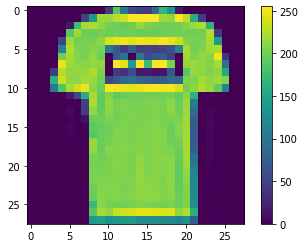

In [23]:
#let's look at what some of these images look like.
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

**Data Preprocessing**

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**Building the Model**

We are going to use a keras sequential model with three different layers. 
This model represents a feed-forward neural network
 
(one that passes values from left to right).

In [25]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
keras.layers.Dense(128, activation='relu'), # hidden layer (2)
keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Compile the Model**

`The last step in building the model is to define the loss function, optimizer and metrics we would like to track.`

In [26]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

**Training the Model**

In [27]:
model.fit(train_images, train_labels, epochs=10) # we pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4991 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3365 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2820 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2699 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

**Evaluating the Model**

We can evaluate easily using another built-in method from keras.



In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8851
Test accuracy: 0.8851000070571899


**Making Predictions**


To make predictions we simply need to pass an array of data in the form 

we've specified in the input layer to .predict() method.

In [29]:
predictions = model.predict(test_images)

In [30]:
# This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1
predictions[0]
# If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array.
np.argmax(predictions[0])
# And we can check if this is correct by looking at the value of the cooresponding test label.
test_labels[0]

9